# Module 2

## Convolutions

First let's have a look at what convolutions do

### Learning Activity 1: Load the Python libraries

Let us start by loading the necessary Python libraries:

In [11]:
import os
import numpy as np
import matplotlib.pyplot as pl

from scipy import misc

% matplotlib inline

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

### Learning Activity 2: Import the data

We are going to start by loading the portrait of Grace Hopper using the `imread()` function:

In [8]:
os.listdir('data')

['cat.jpg',
 'ex1.jpg',
 'ex2.jpg',
 'ex3.jpg',
 'ex3b.jpg',
 'ex4.jpg',
 'ex5.jpg',
 'ex6.jpg',
 'ex7.jpg',
 'grace_hopper.jpg',
 'synset_words.txt']

In [15]:
# Load the grace_hopper.jpg image from the data folder
img = misc.imread('data/grace_hopper.jpg', flatten=True)

The flag flatten means you imported the image as a grey-scale image. This means each pixel is represented by a single value between 0 (black) and 255 (white). You can view the image using the `imshow` function from `matplotlib`:

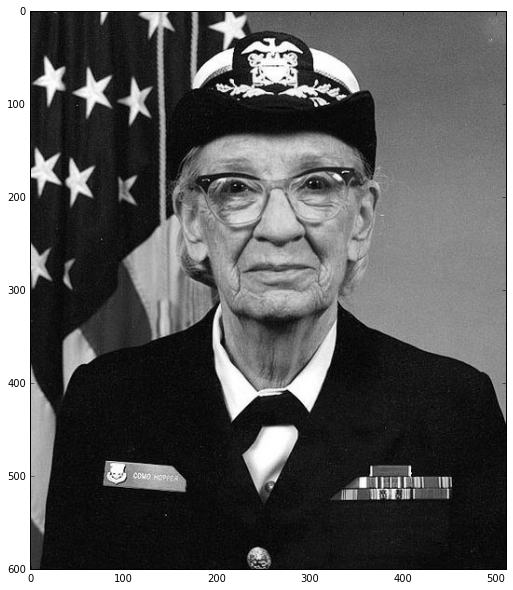

In [16]:
# View the image
pl.imshow(img)

or view a part of the image by selecting a region:

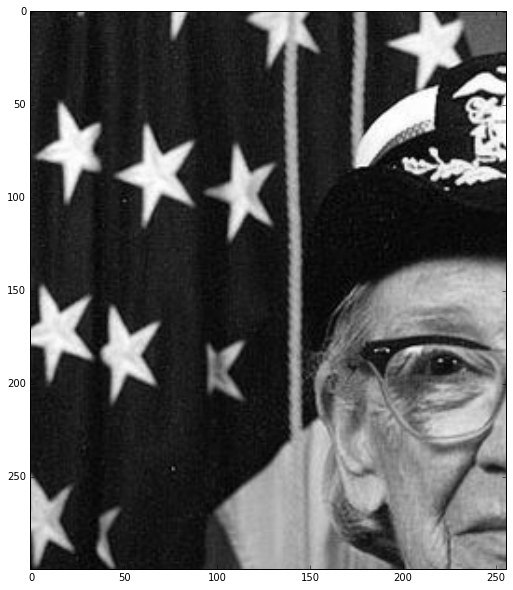

In [19]:
# View a region of the image
x_dim, y_dim = img.shape
pl.imshow(img[0:x_dim/2,0:y_dim/2])

Alternatively, you can view the values of the pixels directly, for example to view the values in the top left corner of the image

In [20]:
# Print the pixel values of a region in the top left corner
img[0:10,0:10]

array([[ 29.14500046,  35.3730011 ,  40.90000153,  42.35599899,
         38.99700165,  35.11100006,  35.27899933,  37.27899933,
         27.0510006 ,  38.82300186],
       [ 34.14500046,  33.3730011 ,  34.90000153,  38.35599899,
         40.99700165,  41.11100006,  37.27899933,  33.27899933,
         36.05099869,  44.82300186],
       [ 29.14500046,  28.37299919,  27.89999962,  29.3560009 ,
         30.99699974,  31.11100006,  28.27899933,  25.27899933,
         38.05099869,  46.29600143],
       [ 42.14500046,  45.3730011 ,  46.90000153,  44.35599899,
         38.99700165,  36.11100006,  38.05099869,  40.05099869,
         32.82300186,  42.29600143],
       [ 34.3730011 ,  33.3730011 ,  31.89999962,  32.35599899,
         30.99699974,  31.11100006,  30.0510006 ,  30.0510006 ,
         27.82299995,  37.29600143],
       [ 42.3730011 ,  34.3730011 ,  29.12800026,  33.35599899,
         42.99700165,  48.11100006,  42.05099869,  35.05099869,
         24.82299995,  32.29600143],
       [ 3

### Learning Activity 3: Define and apply a convolution function

Now lets define a convolution function. First you must define a function which traverses the image to apply the convolution at every point and returns the result in a filtered image. Calculating the size of the filtered image along each dimension can be a little tricky, the formula is: 

                         Size of the filtered image = input image size - filter size + 1

Let us start by implementing the `convolve` function. It takes as input an image and a filter, and returns
the output of applying the filter at each position in the image through a function `multiply_sum`

In [58]:
# Convolution function

def convolve(image, filter):
    filter_height, filter_width = filter.shape[0:2]
    filtered_image = np.ndarray(shape=(image.shape[0] - filter_height + 1, 
                                       image.shape[1] - filter_width + 1))
    
    for x in range(0, filtered_image.shape[0]):
        for y in range(0, filtered_image.shape[1]):
            # We select a local patch of the image
            patch = image[x: x + filter_height, 
                          y: y + filter_width]
            
            # Then apply the convolution operation to it
            filtered_image[x,y] = multiply_sum(patch, filter)
    return filtered_image

Now let's implement the `multiply_sum` function. It takes as input two `numpy` arrays of the same shape, multiplies them elementwise and returns the sum:

In [59]:
# Multiply_sum function

def multiply_sum(patch, filter):
    # Let's make sure our two inputs have the same shape
    assert(patch.shape == filter.shape)
    return np.sum(patch * filter)

An there you have it, a convolution operator! You can apply a filter onto an image and see the result:

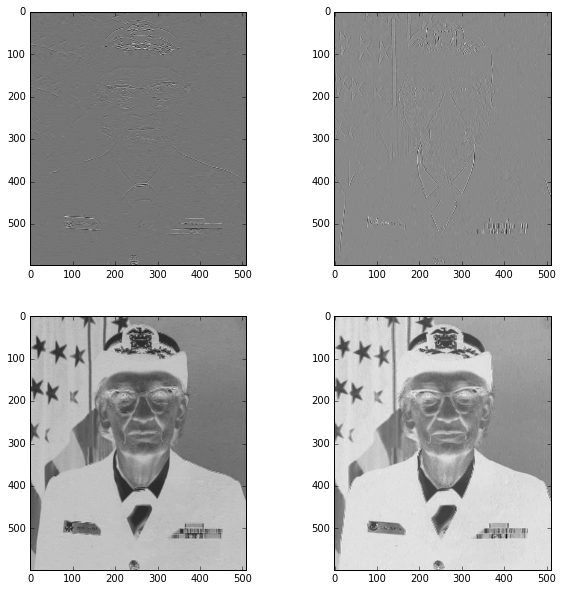

In [60]:
#First define the 3x3 filter
filter = np.array([[-1, -1, -1],
                   [ 2,  2,  2],
                   [-1, -1, -1]])
filter2 = np.array([[-2, -2, -2],
                   [ 2,  2,  2],
                   [-2, -2, -2]])
f=pl.figure()
f.add_subplot('221').imshow(convolve(img, filter))
f.add_subplot('222').imshow(convolve(img, filter.transpose()))
f.add_subplot('223').imshow(convolve(img, filter2))
f.add_subplot('224').imshow(convolve(img, filter2.transpose()))

**Quiz: What did our filter do?** 

1) By looking at the image, can you tell what kind of pattern the filter detected?

2) How would you design a filter which detects vertical edges?

3) What would the following filter do:

filter = np.array([[ 1,  1,  1], 
                   [ 0,  0,  0], 
                   [-1, -1, -1]])

In [61]:
# Define the filter

In [62]:
# Convolve using this filter 

# Show the result 

Transpose the filter: 

In [63]:
# Transpose

In [64]:
# Convolve using this filter 

# Show the result 

### Learning Activity 4: Convolutions with colour

Very good! But what if we had a colour image, how would we use that extra information to detect useful patterns? The idea is simple, on top of having a set weight for each pixel, we have a set weight for each colour channel within that pixel. The following kernel detects region of the image which are mostly brown.

In [65]:
# Create a brown filter 

brown_filter = np.array(
      [[[ 0.13871045,  0.17157242,  0.12934428],
        [ 0.16168842,  0.20229845,  0.14835016],
        [ 0.135694  ,  0.16206263,  0.11727387]],

       [[ 0.04231958,  0.05471011,  0.03167877],
        [ 0.0462575 ,  0.06581022,  0.03104937],
        [ 0.04185439,  0.04734124,  0.02087744]],

       [[-0.15704881, -0.16666673, -0.16600266],
        [-0.17439997, -0.17757156, -0.18760149],
        [-0.15435153, -0.17037505, -0.17269668]]])

print(brown_filter.shape)

(3, 3, 3)


In [66]:
brown_filter.sum()

0.22217882000000005

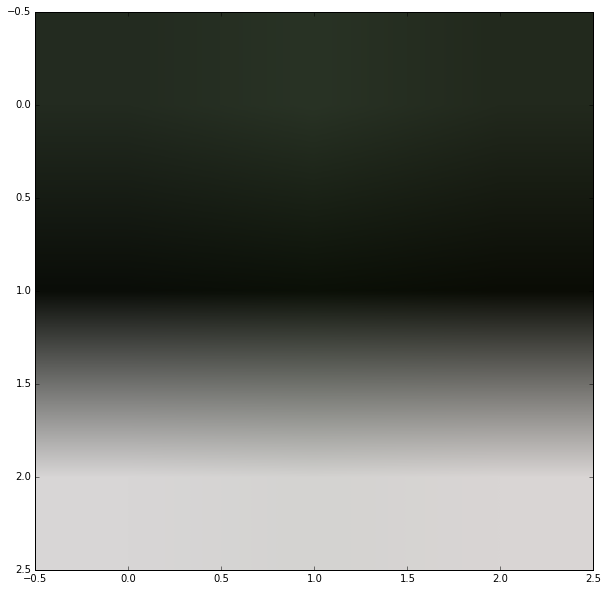

In [67]:
pl.imshow(brown_filter)

The first dimension represents colours. You can see the filter responds to regions that are red, a little green, and not at all blue. Let's load a colourful version of the Grace Hopper portrait

In [68]:
brown_filter.transpose(1, 2, 0).shape

(3, 3, 3)

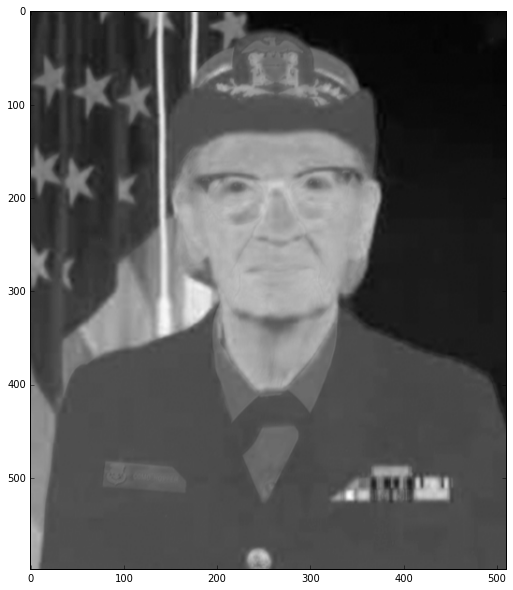

In [69]:
brown_filter_t = brown_filter.transpose(1, 2, 0)
brown_filtered_image = convolve(grace_hopper_colour, brown_filter_t)
plt.imshow(brown_filtered_image)

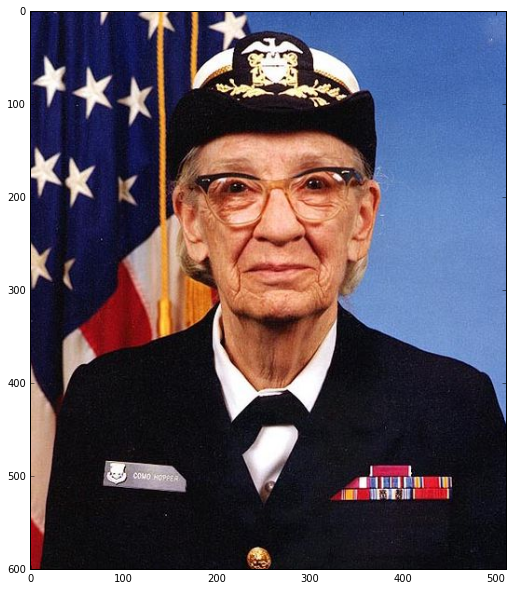

In [70]:
plt.imshow(grace_hopper_colour)

**Quiz** 

Can you design a filter which will detect the edge from the background (blue) to Grace Hopper’s left shoulder (black).

*Hint*: make sure the weights in your lter sum to 0.

In [ ]:
# Answer

We could almost apply our convolution operator already, but the filter we have is currently in the wrong format. The colour channel dimension should be the last one of the filter, same as in our image. This can be fixed by a simple transpose:

In [ ]:
# Transpose the brown filter

## Convolutional Neural networks



Now lets load an already trained network in our environment. This network (VGG-16) has been trained on the Imagenet dataset where the goal is to classify pictures into one of one thousand categories. When it came out in 2014, it won the annual ImageNet Recognition Challenge correctly classifying 93% of the images in the test set. For comparison, humans can achieve around 95% accuracy. It's also very simple, it only uses 3x3 convolutions! It is very deep though and it takes 4 GPUS 2-3 weeks to train it.

To load the model, you must first define it's architecture. You're going to do this step by step as you learn the components of convolutional neural networks. But first, lets load the necessary libraries. We are again going to use the `Keras` library.

### Learning Activity 5: Load the Python libraries

In [71]:
import theano
import cv2

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

Using Theano backend.


### Learning Activity 6: Implementing a convolutional layer

You are going to define the first convolutional layer of the network. But before, you will add some padding to the image so the convolutions get to apply on the outer edges.

In [74]:
# Implement a convolutional layer

# Create the model
vgg_model = Sequential()
# On the very first layer, you must specify the input shape
vgg_model.add(ZeroPadding2D((1,1), input_shape=(3,224,224)))
# Your first convolutional layer will have 64 3x3 filters, and will use a relu activation function
vgg_model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))

### Learning Activity 7: Stacking layers

Now you're going to stack another convolutional layer. Remember, the output of a convolutional layer is a 3-D tensor, just like our input image. Although it does have a much higher depth!

In [75]:
# Stacking layers 
# Once again you must add padding
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))

### Learning Activity 8: Adding pooling layers

Now lets add your first pooling layer. Pooling reduces the width and height of the input by aggregating adjacent cells together.


In [76]:
# Add a pooling layer with window size 2x2
# The stride indicates the distance between each pooled window
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

### Learning Activity 9: Adding more convolutions for VGG

Now you can stack many more of these! Remember not to change the parameters as we are about to load the weights of an already trained version of this network.

In [78]:
# Lots more Convolutional and Pooling layers
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
vgg_model.add(ZeroPadding2D((1,1)))
vgg_model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
vgg_model.add(MaxPooling2D((2,2), strides=(2,2)))

As you can see, the depth of the layers get progressively larger, up to 512 for the latest layers. This
means as we go along, each layer detects a greater number of features. On the other hand, each
max-pooling layer halves the height and width of the layer outputs. Starting from images of dimensions
224x224, the final outputs are only of size 7x7.

Now you're about to add some fully connected layers which can learn the more abstract features of the image. But first you must first change the layout of the input so it looks like a 1-D tensor.

In [79]:
# Flatten the input
vgg_model.add(Flatten())

# Add a fully connected layer with 4096 neurons
vgg_model.add(Dense(4096, activation='relu'))

The `Flatten` function removes the spatial dimensions of the layer output, it is now a simple 1-D row of numbers. This means we can no longer apply convolutions, but can apply fully connected layers like the ones of the perceptron from the previous module.

`Dense` layers are fully connected layers. You used them in the previous module.

### Learning Activity 10: Preventing overfitting with Dropout

`Dropout` is a method used at train time to prevent overfitting. As a layer, it randomly modifies its input
so that the neural network learns to be robust to these changes. Although you won’t actually use it
now, you must define it to correctly load the weights as it was part of the original network.

In [80]:
# Add a dropout layer
vgg_model.add(Dropout(0.5))

The number 0.5 indicates the amount of change, 0.0 means no change, and 1.0 means completely different.


Add one more fully connected layer:

In [81]:
# Add another fully connected layer with 4096 neurons and a Dropout at the output
vgg_model.add(Dense(4096, activation='relu'))
vgg_model.add(Dropout(0.5))

Finally a softmax layer to predict the categories. There are 1000 categories and hence 1000 neurons.

In [82]:
# Add softmax layer
vgg_model.add(Dense(1000, activation='softmax'))

### Learning Activity 11: Loading the weights

And you're all set! Let's load the weights of the network:

In [85]:
os.listdir('datasets')

['cifar-10-batches-py', 'mnist.pkl', 'vgg16_weights.h5']

In [87]:
import pip

In [92]:
pip.main(['install', 'h5py'])

  Using cached h5py-2.6.0.tar.gz
  Running setup.py bdist_wheel for h5py: started
  Running setup.py bdist_wheel for h5py: still running...
  Running setup.py bdist_wheel for h5py: finished with status 'done'
  Stored in directory: /root/.cache/pip/wheels/6b/8e/85/152817c64c2adf4c14ba9e1b79236d3d6d0b3a432408e1a31c
Successfully built h5py


0

In [93]:
weights_path = 'datasets/vgg16_weights.h5'
vgg_model.load_weights(weights_path)

#Compile the network we will explain this later
sgd = SGD()
vgg_model.compile(optimizer=sgd, loss='categorical_crossentropy')


### Learning Activity 12: Preprocessing the data

Lets feed an image to your model. In the VGG network, we only do zero centering. The model takes as input a slightly transformed version of the input:

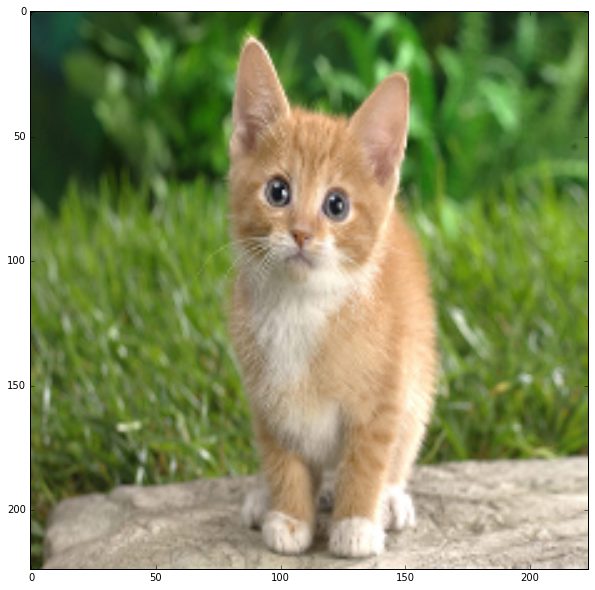

In [94]:
# Load the image

img = cv2.resize(cv2.imread('data/cat.jpg'), (224, 224))

# Transform it to the right formatd
def transform_image(image):
    image_t = np.copy(image).astype(np.float32)       # Avoids modifying the original
    image_t[:,:,0] -= 103.939                    # Substracts mean Red
    image_t[:,:,1] -= 116.779                    # Substracts mean Green
    image_t[:,:,2] -= 123.68                     # Substracts mean Blue
    image_t = image_t.transpose((2,0,1))         # The colour dimension comes first
    image_t = np.expand_dims(image_t, axis=0)    # The network takes batches of images as input
    return image_t

img_t = transform_image(img)

# What does the image look like?
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Learning Activity 13: Getting an output from the network

Now push it through the network and get the output

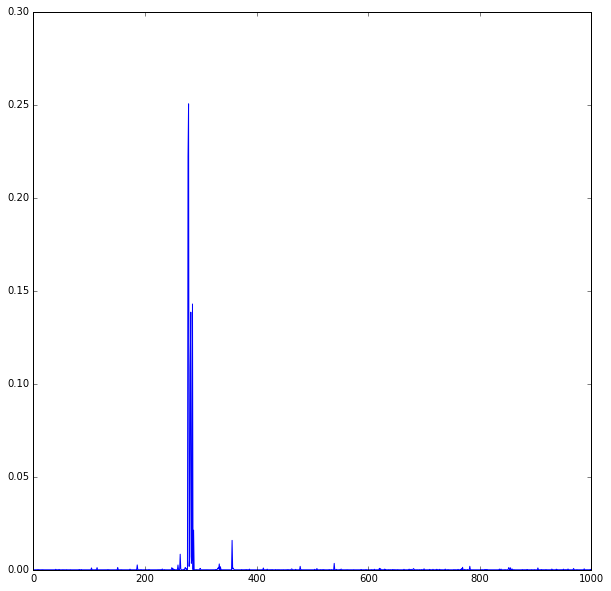

In [98]:
# Push the image through
out = vgg_model.predict(img_t)

#The network takes batches of images, we only want the result for one image
out = out[0]

#The output is an array with 1000 values, one for each category. What does it look like?
plt.plot(out)

The network seems pretty confident! Lets look at its top 5 guesses:

In [102]:
# load labels
imagenet_labels_filename = 'data/synset_words.txt'
labels = np.loadtxt(imagenet_labels_filename, str, delimiter='\t')

# sort top 5 predictions from softmax output
top_5 = out.argsort()[-5:]
print "\n".join(labels[top_5])

n02123045 tabby, tabby cat
n02123159 tiger cat
n02124075 Egyptian cat
n02119022 red fox, Vulpes vulpes
n02119789 kit fox, Vulpes macrotis


I think this could be a: 
	* tabby, tabby cat
	* tiger cat
	* Egyptian cat
	* red fox, Vulpes vulpes
	* kit fox, Vulpes macrotis


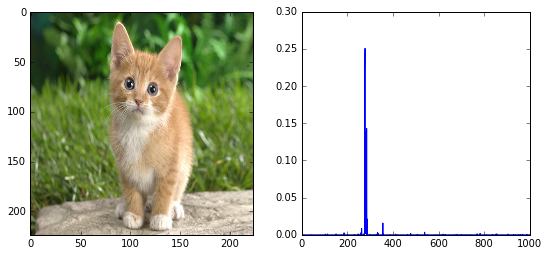

In [118]:
f=pl.figure(figsize=(9,4))
f.add_subplot('121').imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
f.add_subplot('122').plot(out)
print "I think this could be a: \n\t* %s" % "\n\t* ".join([l.split(' ',1)[1] for l in labels[top_5]])

Hurray! Our network knows what it's talking about. Let's have a closer look at what goes on inside.

### Learning Activity 14: Looking inside the network

In a convolutional neural network, there's an easy way to visualise the filters learned at the very first layer. We can print each filter to show which colours it reponds to.

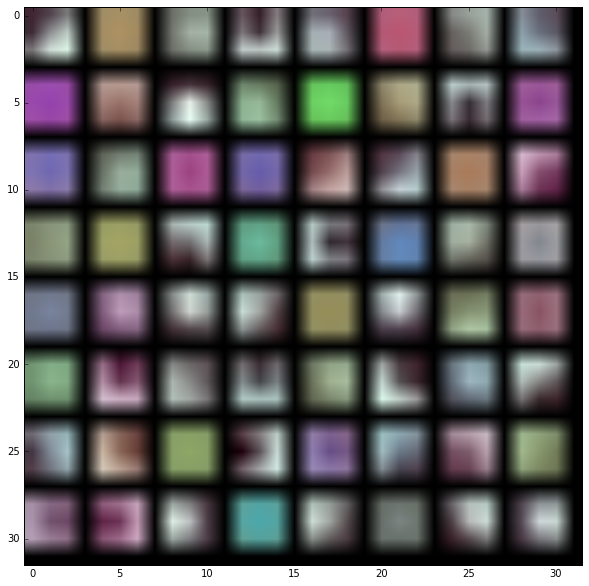

In [119]:
# This is a helper function to let you visualise what goes on inside the network

def vis_square(weights, padsize=1, padval=0):
    #Avoids modifying the network weights
    data = np.copy(weights)
    
    #Normalize the inputs
    data -= data.min()
    data /= data.max()
    
    # Lets tile the inputs
    # How many inputs per row
    n = int(np.ceil(np.sqrt(data.shape[0])))
    
    # Add padding between inputs
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    #place the filters on an n by n grid
    data = data.reshape((n, n) + data.shape[1:])
    
    #merge the filters contents onto a single image
    data = data.transpose((0, 2, 1, 3) + tuple(range(4, data.ndim)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    #show the filter
    plt.imshow(data)
    
# Get the weights of the first convolutional layer
first_layer_weights = vgg_model.layers[1].get_weights()

# first_layer_weights[0] stores the connection weights
# first_layer_weights[1] stores the bias weights
# For now we're interrested in the connections
filters = first_layer_weights[0]

# Visualise the filters
vis_square(filters.transpose(0, 2, 3, 1))

You can see how each filter detects a different property of the input image. Some are designed to respond to certain colours, while some other -- the greyscale looking ones -- detects changes in brightness such as edges. You may notice the brown filter in the top left corner, if we print the values of its weights


In [120]:
print(filters[1])

[[[ 0.13871045  0.17157242  0.12934428]
  [ 0.16168842  0.20229845  0.14835016]
  [ 0.135694    0.16206263  0.11727387]]

 [[ 0.04231958  0.05471011  0.03167877]
  [ 0.0462575   0.06581022  0.03104937]
  [ 0.04185439  0.04734124  0.02087744]]

 [[-0.15704881 -0.16666673 -0.16600266]
  [-0.17439997 -0.17757156 -0.18760149]
  [-0.15435153 -0.17037505 -0.17269668]]]


It is the brown filter we applied to the Grace Hopper portrait above! 

Another way of visualising the network is to see which neurons get activated as the images traverses the network. A neuron outputing a high value means the pattern it has learnt to detect has been observed. Let's apply this to our kitten image.


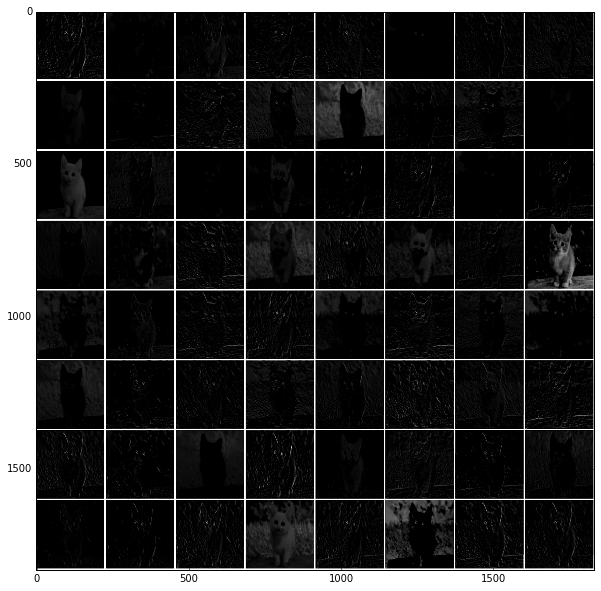

In [121]:
# This function fetches the intermediary output from a layer

def get_layer_output(model, image, layer):
    # This theano function lets us look at the acivations throughout the network
    theano_function = theano.function([model.layers[0].input],
                                       model.layers[layer].output)
    # is and error
    return theano_function(image)[0]

layer_output = get_layer_output(vgg_model, img_t, 1)
vis_square(layer_output, padsize=5, padval=1)

**It's worth spending a moment to understand what is going on here. Each pixel in this image is a different neuron in the neural network. Neurons on the same image sample share the same weights and therefore detect the same feature. You can compare the visualised filters above with their corresponding image sample. For example, have find the bright green filter in the original visualisation and look at its corresponding image response.**



Using this method, it is possible to visualise the deeper parts of the neural network, although they become harder to interpret. You can visualise the output of the second convolutional layer:

In [ ]:
# Visualise the output of the second convolutional layer

And the eighth layer:

In [ ]:
# Visualise the output of the eighth convolutional layer

As we get further down the network, the representations become smaller in their spatial features thanks to the pooling layers. The final convolutional layers only have dimensions 14 by 14.

In [ ]:
# Visualise the output of the final convolutional layers

## Training your own network

Lets train a network! We're going to use the CIFAR10 dataset, in which the goal is to categorise images in one of 10 categories. 

### Learning Activity 15: Loading the CIFAR10 dataset


Load the CIFAR10 dataset:

In [ ]:
# Load the data

# Turn our images into floating point numbers

# Put our input data in the range 0-1

# convert class vectors to binary class matrices

### Learning Activity 16: Building the model

Define the model, we will use a small model so it trains faster.

In [ ]:
# Define the model: Our model has six layers, four convolutional, and two fully connected. The first two layers have a
# depth of 32, meaning they each detect 32 types of filters. They use 3x3 sized filters.

**Quiz: HOW MANY WEIGHTS IN THE NETWORK?**

- How many convolution weights does the first layer contain? What about the second layer?
- Are there any other weights in those layers?

### Learning Activity 17: Define the training schedule

Using Stochastic gradient descent with an initial learning rate of 0.01 with Nesterov momentum, and a
learning rate decay of 1e-6 per iteration

In [ ]:
# Using Stochastic gradient descent with an initial learning rate of 0.01
# With Nesterov momentum, and a learning rate decay of 1e-6 per iteration

### Learning Activity 18: Image pre-processing

Define the preprocessing of the image:

In [ ]:
# Preprocessing, does both normalization and augmentation
datagen = ImageDataGenerator(
        featurewise_center=True,                 # set input mean to 0 over the dataset
        samplewise_center=False,                 # set each sample mean to 0
        featurewise_std_normalization=True,      # divide inputs by std of the dataset
        samplewise_std_normalization=False,      # divide each input by its std
        rotation_range=0,                        # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,                   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,                  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,                    # randomly flip images
        vertical_flip=False)                     # randomly flip images

# Compute quantities required for featurewise normalization (std, mean)
datagen.fit(X_train)

And you're set! You can start training and see the accuracy improve!

In [ ]:
# Train, set, go!!! 

In [89]:
from subprocess import call

In [91]:
call(['apt-get','install', '-y','libhdf5-serial-dev'])

0